# Chapter 3 > Exercise 9

<b>This question involves the use of multiple linear regression on the Auto data set.</b><br>
(a) Produce a scatterplot matrix which includes all of the variables in the data set.<br>
(b) Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative.<br>
(c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output. For instance:<br>
>i. Is there a relationship between the predictors and the response?<br>
ii. Which predictors appear to have a statistically significant relationship to the response?<br>
iii. What does the coefficient for the year variable suggest?<br>

(d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?<br>
(e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?<br>
(f) Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.

In [2]:
Auto=read.table("Auto.data", header = T, na.strings="?")
Auto = na.omit(Auto)
summary(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

<b>(a) Produce a scatterplot matrix which includes all of the variables in the data set.

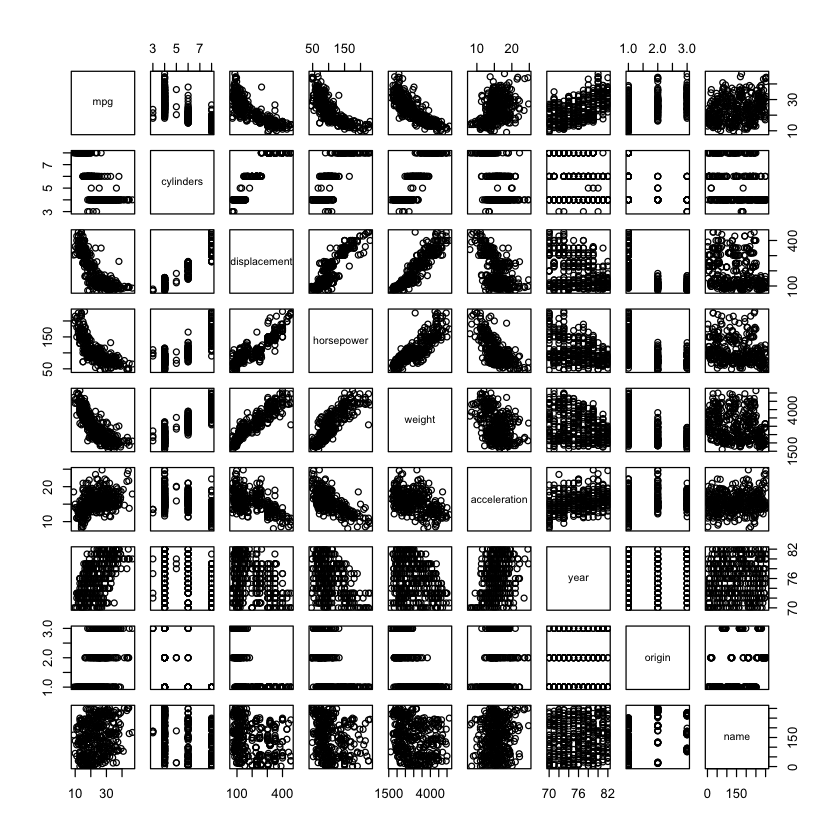

In [3]:
pairs(Auto)

<b>(b) Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative.

In [4]:
#names(Auto)
#Auto$name is qualitative, hence exclude it in cor() function
cor(Auto[,-9])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


<b>(c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output. For instance:<br>
>i. Is there a relationship between the predictors and the response?<br>
<font color="green">Comment:<br>1. R-squared value 82.15% means model captures 82.15% variability of response<br>2. F-statistic is statistically significant with p-value less than 5%, means atleast one predictor is related</font>

> ii. Which predictors appear to have a statistically significant relationship to the response?<br>
<font color="green">Comment: All the predictors where p-value is less than 5% are significant e.g. displacement, weight, year and origin</font>
    
> iii. What does the coefficient for the year variable suggest?<br>
<font color="green">Comment: Coefficient is 0.75, it represent positive relationship with response</font>

In [5]:
lmodel = lm(mpg~.-name,data=Auto)
summary(lmodel)


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


<b>(d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?</b>

> <font color="green">
    Comment:<br>
    Non-linear relationship is seen from Residuals plot fig 1.<br>
    Non-constant variance of Error term is seen from Residuals plot fig 1.<br>
    Three outliers identified are observation# 323, 326 & 327 in fig 3. See Scale-location plot, these three observations are quite high above 1.732 level i.e. sqrt(3) in Y-axis, above this level is an Outliers zone.<br>
    Observation# 14 is high leverage in 4th fig but respective std. residual is not high.
</font>

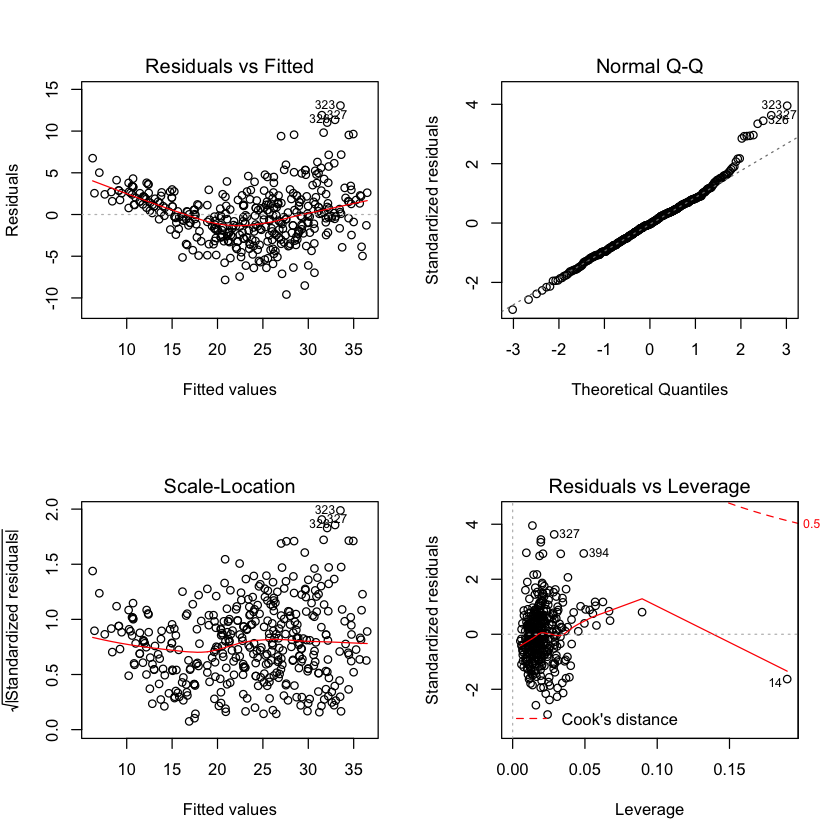

In [6]:
par(mfrow=c(2,2))
plot(lmodel)

<b>(e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?
> <font color="green">
    Comment: Variables cylinders, displacement, horsepower and weight have VIF value exceeding 5 which indicates high collinearity among variables.<br>Not much improvement seen with interaction term. Standard error is still around 4.0.
    </font>

In [7]:
library(carData)
library(car)
print(vif(lmodel))

   cylinders displacement   horsepower       weight acceleration         year 
   10.737535    21.836792     9.943693    10.831260     2.625806     1.244952 
      origin 
    1.772386 


In [40]:
#cylinders+displacement+horsepower+weight+acceleration+year+origin
#simple linear regression with single variable
lm1=lm(mpg~cylinders,data=Auto)
summary(lm1)$call
summary(lm1)$sigma

lm1=lm(mpg~displacement,data=Auto)
summary(lm1)$call
summary(lm1)$sigma

lm1=lm(mpg~horsepower,data=Auto)
summary(lm1)$call
summary(lm1)$sigma

lm1=lm(mpg~weight,data=Auto)
summary(lm1)$call
summary(lm1)$sigma

lm1=lm(mpg~acceleration,data=Auto)
summary(lm1)$call
summary(lm1)$sigma
lm1=lm(mpg~year,data=Auto)
summary(lm1)$call
summary(lm1)$sigma
lm1=lm(mpg~origin,data=Auto)
summary(lm1)$call
summary(lm1)$sigma

#multiple linear regression with interaction term
lm1=lm(mpg~cylinders*displacement,data=Auto)
summary(lm1)$call
summary(lm1)$sigma

lm1=lm(mpg~cylinders*horsepower,data=Auto)
summary(lm1)$call
summary(lm1)$sigma

lm1=lm(mpg~cylinders*weight,data=Auto)
summary(lm1)$call
summary(lm1)$sigma

lm1=lm(mpg~displacement*horsepower,data=Auto)
summary(lm1)$call
summary(lm1)$sigma

lm1=lm(mpg~displacement*weight,data=Auto)
summary(lm1)$call
summary(lm1)$sigma

lm1=lm(mpg~horsepower*weight,data=Auto)
summary(lm1)$call
summary(lm1)$sigma

lm(formula = mpg ~ cylinders, data = Auto)

[1] 4.913589

lm(formula = mpg ~ displacement, data = Auto)

[1] 4.635101

lm(formula = mpg ~ horsepower, data = Auto)

[1] 4.905757

lm(formula = mpg ~ weight, data = Auto)

[1] 4.332712

lm(formula = mpg ~ acceleration, data = Auto)

[1] 7.080211

lm(formula = mpg ~ year, data = Auto)

[1] 6.363222

lm(formula = mpg ~ origin, data = Auto)

[1] 6.446974

lm(formula = mpg ~ cylinders * displacement, data = Auto)

[1] 4.45356

lm(formula = mpg ~ cylinders * horsepower, data = Auto)

[1] 4.093657

lm(formula = mpg ~ cylinders * weight, data = Auto)

[1] 4.165446

lm(formula = mpg ~ displacement * horsepower, data = Auto)

[1] 3.944233

lm(formula = mpg ~ displacement * weight, data = Auto)

[1] 4.097351

lm(formula = mpg ~ horsepower * weight, data = Auto)

[1] 3.929803

<b>(f) Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.</b><br>
> <font color="green">
    Comment: Much improvement seen after applying log function to response variable, best std error reduced to 0.165.
    </font>

In [67]:
lm1=lm(mpg~I(log(displacement)),data=Auto)
summary(lm1)$call
summary(lm1)$sigma

lm1=lm(I(log(mpg))~displacement,data=Auto)
summary(lm1)$call
summary(lm1)$sigma

lm1=lm(I(log(mpg))~I(log(displacement)),data=Auto)
summary(lm1)$call
summary(lm1)$sigma

lm1=lm(mpg~I(log(weight)),data=Auto)
summary(lm1)$call
summary(lm1)$sigma

lm1=lm(I(log(mpg))~weight,data=Auto)
summary(lm1)$call
summary(lm1)$sigma

lm1=lm(I(log(mpg))~I(log(weight)),data=Auto)
summary(lm1)$call
summary(lm1)$sigma

lm1=lm(I(log(mpg))~I(log(horsepower)),data=Auto)
summary(lm1)$call
summary(lm1)$sigma

lm1=lm(mpg~I(sqrt(displacement)),data=Auto)
summary(lm1)$call
summary(lm1)$sigma

lm1=lm(I(sqrt(mpg))~displacement,data=Auto)
summary(lm1)$call
summary(lm1)$sigma

lm1=lm(I(sqrt(mpg))~I(sqrt(displacement)),data=Auto)
summary(lm1)$call
summary(lm1)$sigma

lm1=lm(mpg~I(sqrt(weight)),data=Auto)
summary(lm1)$call
summary(lm1)$sigma

lm1=lm(I(sqrt(mpg))~weight,data=Auto)
summary(lm1)$call
summary(lm1)$sigma

lm1=lm(I(sqrt(mpg))~I(sqrt(weight)),data=Auto)
summary(lm1)$call
summary(lm1)$sigma

lm1=lm(I(sqrt(mpg))~I(sqrt(horsepower)),data=Auto)
summary(lm1)$call
summary(lm1)$sigma


lm(formula = mpg ~ I(log(displacement)), data = Auto)

[1] 4.376858

lm(formula = I(log(mpg)) ~ displacement, data = Auto)

[1] 0.1773123

lm(formula = I(log(mpg)) ~ I(log(displacement)), data = Auto)

[1] 0.1736903

lm(formula = mpg ~ I(log(weight)), data = Auto)

[1] 4.189142

lm(formula = I(log(mpg)) ~ weight, data = Auto)

[1] 0.1644259

lm(formula = I(log(mpg)) ~ I(log(weight)), data = Auto)

[1] 0.1651321

lm(formula = I(log(mpg)) ~ I(log(horsepower)), data = Auto)

[1] 0.1792925

lm(formula = mpg ~ I(sqrt(displacement)), data = Auto)

[1] 4.458082

lm(formula = I(sqrt(mpg)) ~ displacement, data = Auto)

[1] 0.4444914

lm(formula = I(sqrt(mpg)) ~ I(sqrt(displacement)), data = Auto)

[1] 0.4291301

lm(formula = mpg ~ I(sqrt(weight)), data = Auto)

[1] 4.239166

lm(formula = I(sqrt(mpg)) ~ weight, data = Auto)

[1] 0.4134003

lm(formula = I(sqrt(mpg)) ~ I(sqrt(weight)), data = Auto)

[1] 0.4069298

lm(formula = I(sqrt(mpg)) ~ I(sqrt(horsepower)), data = Auto)

[1] 0.4524026